<a href="https://colab.research.google.com/github/Merina62/AI-and-ML/blob/main/MerinaShrestha_Worksheetk_7__ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Merina Shrestha

Student no: np03cs4a220406

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


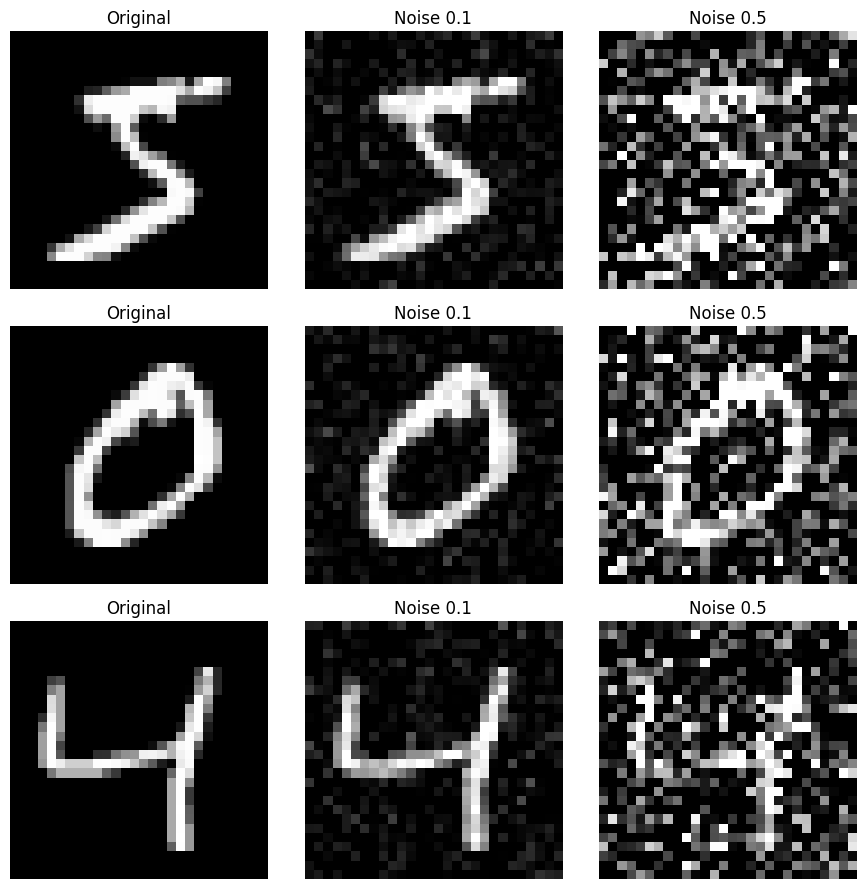

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load and preprocess MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Generate noisy versions
noise_factor_low = 0.1
noise_factor_high = 0.5

x_train_noisy_low = x_train + noise_factor_low * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_train_noisy_high = x_train + noise_factor_high * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy_low = x_test + noise_factor_low * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy_high = x_test + noise_factor_high * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip pixel values to [0, 1]
x_train_noisy_low = np.clip(x_train_noisy_low, 0., 1.)
x_train_noisy_high = np.clip(x_train_noisy_high, 0., 1.)
x_test_noisy_low = np.clip(x_test_noisy_low, 0., 1.)
x_test_noisy_high = np.clip(x_test_noisy_high, 0., 1.)

# Visualize in a 3 x 3 grid
n = 3  # number of images to show
plt.figure(figsize=(9, 9))
for i in range(n):
    # Original image
    ax = plt.subplot(n, 3, i * 3 + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Low noise image
    ax = plt.subplot(n, 3, i * 3 + 2)
    plt.imshow(x_train_noisy_low[i].reshape(28, 28), cmap='gray')
    plt.title("Noise 0.1")
    plt.axis('off')

    # High noise image
    ax = plt.subplot(n, 3, i * 3 + 3)
    plt.imshow(x_train_noisy_high[i].reshape(28, 28), cmap='gray')
    plt.title("Noise 0.5")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D

def build_encoder(input_shape=(28, 28, 1)):
    """
    Builds the encoder part of the convolutional autoencoder.

    Parameters:
    input_shape (tuple): Shape of the input image. Default is (28, 28, 1) for MNIST.

    Returns:
    input_img (Keras Input): Input layer of the model.
    encoded (Keras Tensor): Encoded representation after convolution and pooling.
    """
    input_img = Input(shape=input_shape, name="input")
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same', name="encoded")(x)

    return input_img, encoded


In [4]:
from tensorflow.keras.layers import Conv2D, UpSampling2D

def build_decoder(encoded_input):
    """
    Builds the decoder part of the convolutional autoencoder.

    Parameters:
    encoded_input (Keras Tensor): The output from the encoder.

    Returns:
    decoded (Keras Tensor): The reconstructed output after upsampling and convolution.
    """
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded_input)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name="decoded")(x)

    return decoded


In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_autoencoder():
    """
    Constructs and compiles the full convolutional autoencoder by connecting encoder and decoder.

    Returns:
    autoencoder (Keras Model): Compiled autoencoder model.
    """
    input_img, encoded_output = build_encoder()
    decoded_output = build_decoder(encoded_output)

    autoencoder = Model(inputs=input_img, outputs=decoded_output, name="autoencoder")
    autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

    return autoencoder


In [6]:
autoencoder = build_autoencoder()
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded (MaxPooling2D)          │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoded (Conv2D)                │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Build the autoencoder from previous steps
autoencoder = build_autoencoder()
# Train with noisy input and clean target
history = autoencoder.fit(
x_train_noisy_high, x_train,
epochs=10,
batch_size=128,
shuffle=True,
validation_data=(x_test_noisy_high, x_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 180s 379ms/step - loss: 0.2296 - val_loss: 0.1128
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 170s 361ms/step - loss: 0.1120 - val_loss: 0.1058
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 214s 389ms/step - loss: 0.1058 - val_loss: 0.1031
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 185s 353ms/step - loss: 0.1027 - val_loss: 0.0998
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 355ms/step - loss: 0.1002 - val_loss: 0.0988
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 166s 353ms/step - loss: 0.0989 - val_loss: 0.0974
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 196s 342ms/step - loss: 0.0980 - val_loss: 0.0968
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 344ms/step - loss: 0.0972 - val_loss: 0.0961
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 348ms/step - loss: 0.0967 - val_loss: 0.0956
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 343ms/step - loss: 0.0960 - val_loss: 0.0953


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step


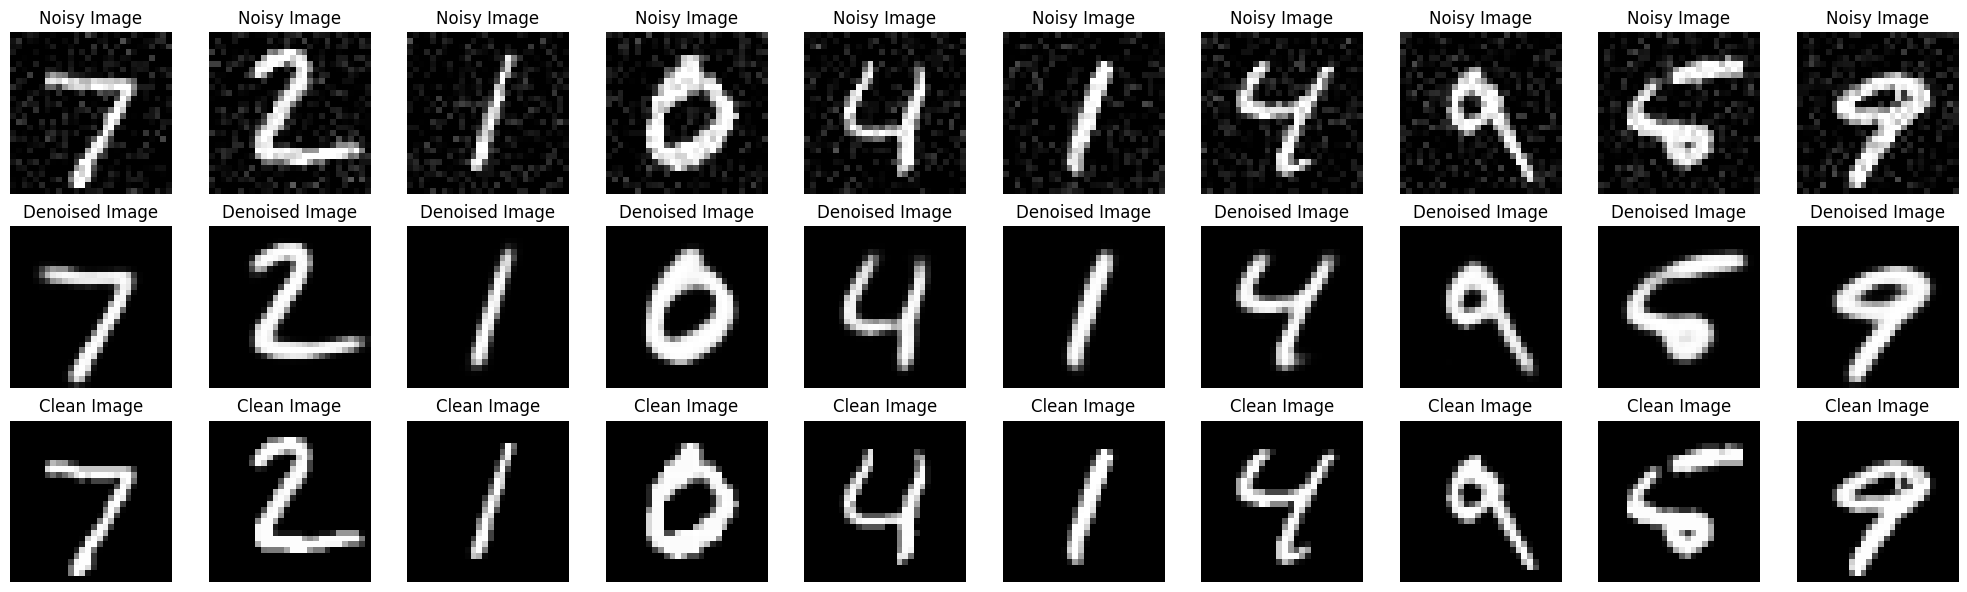

In [9]:
# Predict the denoised images from noisy test images
denoised_images = autoencoder.predict(x_test_noisy_low)  # or x_test_noisy_high

# Function to display images
def plot_images(noisy_images, denoised_images, clean_images, n=10):
    plt.figure(figsize=(20, 6))
    for i in range(n):
        # Plot noisy images
        plt.subplot(3, n, i + 1)
        plt.imshow(noisy_images[i].reshape(28, 28), cmap='gray')
        plt.title("Noisy Image")
        plt.axis('off')

        # Plot denoised images
        plt.subplot(3, n, i + 1 + n)
        plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
        plt.title("Denoised Image")
        plt.axis('off')

        # Plot clean images
        plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(clean_images[i].reshape(28, 28), cmap='gray')
        plt.title("Clean Image")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the first 10 images
plot_images(x_test_noisy_low, denoised_images, x_test, n=10)


# Exercise: Build a Denoising Convolutional Autoencoder

In [10]:
# 1. Imports and Setup
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle

In [12]:
# 2. Load and Preprocess Dataset
def load_images_from_folder(folder_path, image_size=(32, 32)):
    images = []
    for label in sorted(os.listdir(folder_path)):
        label_folder = os.path.join(folder_path, label)
        if not os.path.isdir(label_folder):
            continue
        for file in os.listdir(label_folder):
            try:
                img_path = os.path.join(label_folder, file)
                img = Image.open(img_path).convert("L").resize(image_size)
                img_array = np.array(img) / 255.0  # Normalize
                images.append(img_array)
            except:
                pass
    images = np.array(images)
    images = np.expand_dims(images, axis=-1)  # Add channel dimension
    return images

train_path = "/content/drive/MyDrive/AI- 6CS012/Week-4/DevanagariHandwrittenDigitDataset/Train"
test_path = "/content/drive/MyDrive/AI- 6CS012/Week-4/DevanagariHandwrittenDigitDataset/Test"

x_train = load_images_from_folder(train_path)
x_test = load_images_from_folder(test_path)

x_train, x_val = train_test_split(x_train, test_size=0.1, random_state=42)

In [13]:
# 3. Add Noise to Images
def add_gaussian_noise(images, noise_factor=0.3):
    noisy = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy, 0., 1.)

x_train_noisy = add_gaussian_noise(x_train)
x_val_noisy = add_gaussian_noise(x_val)
x_test_noisy = add_gaussian_noise(x_test)

In [14]:
# 4. Build the Autoencoder
def build_autoencoder(input_shape=(32, 32, 1)):
    input_img = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Bottleneck
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
    return autoencoder

autoencoder = build_autoencoder()


In [15]:
# 5. Train the Autoencoder
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_val_noisy, x_val)
)

Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 83s 660ms/step - loss: 0.4443 - val_loss: 0.2169
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 81s 656ms/step - loss: 0.2045 - val_loss: 0.1772
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 79s 634ms/step - loss: 0.1734 - val_loss: 0.1615
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 686ms/step - loss: 0.1610 - val_loss: 0.1585
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 134s 623ms/step - loss: 0.1526 - val_loss: 0.1471
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 85s 652ms/step - loss: 0.1464 - val_loss: 0.1430
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 78s 651ms/step - loss: 0.1428 - val_loss: 0.1405
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 78s 653ms/step - loss: 0.1401 - val_loss: 0.1385
Epoch 9/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 79s 627ms/step - loss: 0.1378 - val_loss: 0.1363
Epoch 10/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 81s 623ms/step - loss: 0.1361 - val_loss: 0.1350
Epoch 11/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 85s 648ms/step - loss: 0.1350 - val_loss: 0.1339
Epoch 12/20
120/12

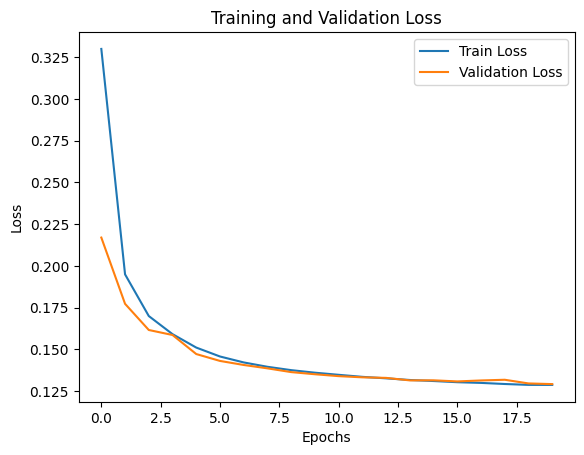

In [16]:
# 6. Visualize Training Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step


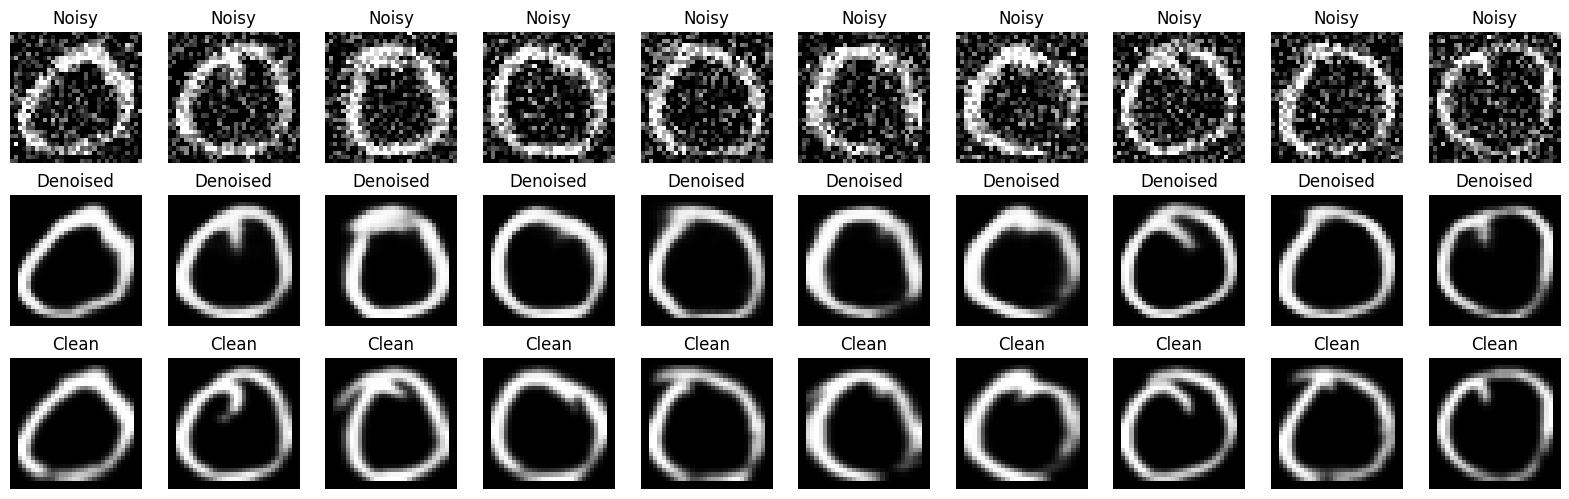

In [17]:
# 7. Visualize Results
def plot_images(noisy_images, denoised_images, clean_images, n=10):
    plt.figure(figsize=(20, 6))
    for i in range(n):
        plt.subplot(3, n, i + 1)
        plt.imshow(noisy_images[i].reshape(32, 32), cmap='gray')
        plt.title("Noisy")
        plt.axis('off')

        plt.subplot(3, n, i + 1 + n)
        plt.imshow(denoised_images[i].reshape(32, 32), cmap='gray')
        plt.title("Denoised")
        plt.axis('off')

        plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(clean_images[i].reshape(32, 32), cmap='gray')
        plt.title("Clean")
        plt.axis('off')
    plt.show()

# Predict and Plot
denoised_images = autoencoder.predict(x_test_noisy)
plot_images(x_test_noisy, denoised_images, x_test)